## PROJECT: TIME SERIES ANALYSIS OF NAICS

### A: Introduction

* **NAICS Dataset Purpose** 

The North American Industry Classification System (NAICS) is an industry classification system developed by the
statistical agencies of Canada, Mexico and the United States. Created against the background of the North
American Free Trade Agreement, it is designed to provide common definitions of the industrial structure of the three
countries and a common statistical framework to facilitate the analysis of the three economies. NAICS is based on
supply-side or production-oriented principles, to ensure that industrial data, classified to NAICS, are suitable for the
analysis of production-related issues such as industrial performance.
NAICS is a comprehensive system encompassing all economic activities. It has a hierarchical structure. At the
highest level, it divides the economy into 20 sectors. At lower levels, it further distinguishes the different economic
activities in which businesses are engaged.

* **Task**

Prepare the data set and analyze as DS

#### Questions
* Which most companies hired the most in Canada?
* How employment in Construction evolved overtime? In which month the recruitments are most important?
* How employment in Construction evolved over time, compared to the total employment across all industries?
* How food manufacturing companies have evolved in recruitment over time ? In which month the recruitments are most important?

* How employment in Repair, personal and non-profit services evolved over time? At what month are volunteers most needed?



### B: Preparation of the data set

In [55]:
#Load packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import zipfile
import os, glob
print(os.listdir())

['.ipynb_checkpoints', 'alldata.xlsx', 'A_NEWLY_HIRED_DATA_ANALYST', 'A_NEWLY_HIRED_DATA_ANALYST.zip', 'cd2.xlsx', 'cd3.xlsx', 'cd4.xlsx', 'Challenge.ipynb', 'Data Scientist.ipynb', 'data.csv', 'data.xlsx', 'Deep.ipynb', 'In_SynthDataArachide2019prArticle.csv', 'LMO_Detailed_Industries_by_NAICS.xlsx', 'merged.csv', 'NAICS_2.csv', 'NAICS_3.csv', 'NAICS_4.csv', 'p.xlsx', 'parkinsons.data', 'parkinsons.names', 'pd_speech_features.csv', 'script_parkinson.ipynb', 'setie.xlsx', 'Time_Series_NAICS', 'Time_Series_NAICS.ipynb', 'tt.xlsx', 'tt1.xlsx', 'tt2.xlsx', 'Untitled.ipynb', 'Untitled1.ipynb', 'Untitled2.ipynb', 'Untitled3.ipynb']


In [56]:
path = "C:/Users/MyAgro/Documents/GitHub/Data Challenge/A_NEWLY_HIRED_DATA_ANALYST"

#### ***a- Preprocessing of the five 2-digit NAICS datasets***

In [57]:
##Load 5 of 5 datasets

doc1 = glob.glob(os.path.join(path, "RTRA_Employ_2NAICS_*.csv"))
doc1
f_csv = (pd.read_csv(y, sep=',') for y in doc1)
f_csv

df1 = pd.concat(f_csv, ignore_index=True)

df1.to_csv( "NAICS_2.csv")


df1 = pd.read_csv("NAICS_2.csv")
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5472 entries, 0 to 5471
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    5472 non-null   int64 
 1   SYEAR         5472 non-null   int64 
 2   SMTH          5472 non-null   int64 
 3   NAICS         5472 non-null   object
 4   _EMPLOYMENT_  5472 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 213.9+ KB


In [58]:
###Preprocessing for dataset 1 
df1.dropna(inplace = True) 
_ = df1["NAICS"].str.split("[", expand = True) 
df1["_NAICS_"]= _[0] 

_ = _[1].str.split("]", expand = True) 
df1["CODE"]= _[0] 

_ = df1["CODE"].str.split("-", expand = True)
df1["CODE1"] = _[0] # for lower code
df1["CODE2"] = _[1] # for upper code

#select only the columns
cols = ['SYEAR', 'SMTH', '_NAICS_', 'CODE1', 'CODE2', '_EMPLOYMENT_']

df1 = df1[cols]
df1 = df1.rename(columns={"_NAICS_": "NAICS", "_EMPLOYMENT_": "EMPLOYMENT"})
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5472 entries, 0 to 5471
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   SYEAR       5472 non-null   int64 
 1   SMTH        5472 non-null   int64 
 2   NAICS       5472 non-null   object
 3   CODE1       5472 non-null   object
 4   CODE2       828 non-null    object
 5   EMPLOYMENT  5472 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 299.2+ KB


#### ***b- Preprocessing of the five 3-digit NAICS datasets***

In [59]:
doc2= glob.glob(os.path.join(path, "RTRA_Employ_3NAICS_*.csv"))
doc2
f2_csv = (pd.read_csv(y, sep=',') for y in doc2)
f2_csv

df2 = pd.concat(f2_csv, ignore_index=True)

df2.to_csv( "NAICS_3.csv")


df2 = pd.read_csv("NAICS_3.csv")
df2.head()

,Unnamed: 0,SYEAR,SMTH,NAICS,_EMPLOYMENT_
0,0,2000,1,Aboriginal public administration[914],500
1,1,2000,1,Accommodation services[721],33750
2,2,2000,1,Administrative and support services[561],55250
3,3,2000,1,Air transportation[481],17500
4,4,2000,1,Ambulatory health care services[621],53000


In [60]:
###Preprocessing for dataset 2
df2.dropna(inplace = True) 
_ = df2["NAICS"].str.split("[", expand = True) 
df2["_NAICS_"]= _[0] 
_ = _[1].str.split("]", expand = True) 
df2["CODE1"]= _[0] # for lower code

df2["CODE2"] = None # for upper code

#select only the columns
cols = ['SYEAR', 'SMTH', '_NAICS_', 'CODE1', 'CODE2', '_EMPLOYMENT_']

df2 = df2[cols]
df2 = df2.rename(columns={"_NAICS_": "NAICS", "_EMPLOYMENT_": "EMPLOYMENT"})

df2


,SYEAR,SMTH,NAICS,CODE1,CODE2,EMPLOYMENT
0,2000,1,Aboriginal public administration,914,None,500
1,2000,1,Accommodation services,721,None,33750
2,2000,1,Administrative and support services,561,None,55250
3,2000,1,Air transportation,481,None,17500
4,2000,1,Ambulatory health care services,621,None,53000
...,...,...,...,...,...,...
28135,1999,12,Utilities,221,None,10000
28136,1999,12,Warehousing and storage,493,None,4500
28137,1999,12,Waste management and remediation services,562,None,4500
28138,1999,12,Water transportation,483,None,6750


#### ***c- Preprocessing of the five 4-digit NAICS datasets***

In [61]:
doc3= glob.glob(os.path.join(path, "RTRA_Employ_4NAICS_*.csv"))
doc3
f3_csv = (pd.read_csv(y, sep=',') for y in doc3)
f3_csv

df3 = pd.concat(f3_csv, ignore_index=True)

df3.to_csv( "NAICS_4.csv")


df3 = pd.read_csv("NAICS_4.csv")
df3.head()

,Unnamed: 0,SYEAR,SMTH,NAICS,_EMPLOYMENT_
0,0,2000,1,1100,500
1,1,2000,1,1111,0
2,2,2000,1,1112,2000
3,3,2000,1,1113,250
4,4,2000,1,1114,7750


In [62]:
# CODE1 for lower code

df3["CODE2"] = None # for upper code

#select only the columns
cols = ['SYEAR', 'SMTH', 'NAICS', 'CODE2', '_EMPLOYMENT_']

df3 = df3[cols]
df3 = df3.rename(columns={"NAICS": "CODE1", "_EMPLOYMENT_": "EMPLOYMENT"})

df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85572 entries, 0 to 85571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   SYEAR       85572 non-null  int64 
 1   SMTH        85572 non-null  int64 
 2   CODE1       85572 non-null  int64 
 3   CODE2       0 non-null      object
 4   EMPLOYMENT  85572 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 3.3+ MB


#### ***d- Join all dataset in one***

In [109]:
d2frame = [df2,df3]
dataset = df1.append(d2frame, ignore_index=True)
#Limit year corresponding to output excel file
dataset = dataset[(dataset["SYEAR"] > 1996) & (dataset["SYEAR"] < 2019)]
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114048 entries, 0 to 119183
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   SYEAR       114048 non-null  int64 
 1   SMTH        114048 non-null  int64 
 2   NAICS       32172 non-null   object
 3   CODE1       113520 non-null  object
 4   CODE2       792 non-null     object
 5   EMPLOYMENT  114048 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 6.1+ MB


#### ***e- Extraction Industries code in LMO_Detailed_Industries_by_NAICS file***

In [110]:
code = pd.read_excel('LMO_Detailed_Industries_by_NAICS.xlsx')
code['NAICS'].replace('&',',',inplace=True, regex=True)
code['NAICS'] = code['NAICS'].apply(lambda _: str(_))
code['NAICS2'] = code['NAICS'].replace('&',',',regex=True)
c = list(code['NAICS2'].values)


In [111]:
from itertools import chain 
code['NAICS3'] = code['NAICS2'].astype('string')
x = code.NAICS3.str.split(',',expand=True)
ls_code = list(chain.from_iterable(list(x.values)))
new_list = [i for i in ls_code if str(i) != '<NA>']

In [112]:
print(new_list)

['111 ', ' 112', '114', '113', '115', '211', '213', '212', '22', '23', '311 ', ' 312', '321', '322', '331', '332', '333', '3366', '3361', '  3362', '  3363', ' 3364', ' 3365', ' 3369', '313', ' 314', ' 315', ' 316', ' 323', ' 324', ' 325', ' 326', ' 327', ' 334', ' 335', ' 337 ', ' 339', '41', '441', '446', '442', '443', '444', '445', '446', '447', '448', '451', '452', '453 ', ' 454', '481', '482', '483', '484', '488', '491 ', ' 492', '485', '486 ', ' 487', '493', '524', '521', ' 522', ' 523 ', ' 526', '53', '5413', '5415', '5416', '5411', ' 5412', ' 5414', ' 5417', ' 5418 ', ' 5419', '55 ', ' 56', '6111', '6112', '6113', '6114', ' 6115', ' 6116 ', ' 6117', '621', '622', '623', '624', '511', '512', '517', '515', ' 518 ', ' 519', '711', '713', '712', '721', '722', '81', '911', '912', '913', ' 914 ', ' 919']


In [113]:
##Conversion my list type in integer
list_of_code = [int(i) for i in new_list]

In [114]:
print(list_of_code)

[111, 112, 114, 113, 115, 211, 213, 212, 22, 23, 311, 312, 321, 322, 331, 332, 333, 3366, 3361, 3362, 3363, 3364, 3365, 3369, 313, 314, 315, 316, 323, 324, 325, 326, 327, 334, 335, 337, 339, 41, 441, 446, 442, 443, 444, 445, 446, 447, 448, 451, 452, 453, 454, 481, 482, 483, 484, 488, 491, 492, 485, 486, 487, 493, 524, 521, 522, 523, 526, 53, 5413, 5415, 5416, 5411, 5412, 5414, 5417, 5418, 5419, 55, 56, 6111, 6112, 6113, 6114, 6115, 6116, 6117, 621, 622, 623, 624, 511, 512, 517, 515, 518, 519, 711, 713, 712, 721, 722, 81, 911, 912, 913, 914, 919]


### C: Data analysis
 *   dataset for the time series analysis
 *   list of code of industries for queries to extract subdata

In [115]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114048 entries, 0 to 119183
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   SYEAR       114048 non-null  int64 
 1   SMTH        114048 non-null  int64 
 2   NAICS       32172 non-null   object
 3   CODE1       113520 non-null  object
 4   CODE2       792 non-null     object
 5   EMPLOYMENT  114048 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 6.1+ MB


In [116]:
nam = {'EMPLOYMENT': 'Employment', 'SYEAR': 'Year', 
       'SMTH': 'Month', 'NAICS': 'Naics', 'CODE1': 'Code'}
dataset = dataset.rename(columns=nam)
dataset['Code'] = dataset['Code'].astype('string')
dataset['Code'] = dataset['Code'].astype('Int64')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114048 entries, 0 to 119183
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Year        114048 non-null  int64 
 1   Month       114048 non-null  int64 
 2   Naics       32172 non-null   object
 3   Code        113520 non-null  Int64 
 4   CODE2       792 non-null     object
 5   Employment  114048 non-null  int64 
dtypes: Int64(1), int64(3), object(2)
memory usage: 6.2+ MB


In [117]:
dataset.loc[dataset['Code'].isin([x for x in list_of_code if x<100])]

,Year,Month,Naics,Code,CODE2,Employment
1,2000,1,"Administrative and support, waste management a...",56,None,59250
4,2000,1,Construction,23,None,106250
9,2000,1,Management of companies and enterprises,55,None,1000
12,2000,1,Other services (except public administration),81,None,100250
15,2000,1,"Real estate, rental and leasing",53,None,37500
...,...,...,...,...,...,...
5461,1999,12,Management of companies and enterprises,55,None,1250
5464,1999,12,Other services (except public administration),81,None,99500
5467,1999,12,"Real estate, rental and leasing",53,None,37000
5470,1999,12,Utilities,22,None,10250


In [118]:
cd2 = dataset.loc[dataset['Code'].isin([x for x in list_of_code if x<100])]
cd3 = dataset.loc[dataset['Code'].isin([x for x in list_of_code if x>99 and x<1000])]
cd4 = dataset.loc[dataset['Code'].isin([x for x in list_of_code if x>999])]

#### Questions
* Which most companies hired the most in Canada?
* How employment in Construction evolved overtime? In which month the recruitments are most important?
* How employment in Construction evolved over time, compared to the total employment across all industries?
* How food manufacturing companies have evolved in recruitment over time ? In which month the recruitments are most important?

* How employment in Repair, personal and non-profit services evolved over time? At what month are volunteers most needed?



**Q1: Which 3 companies hired the most in Canada?**

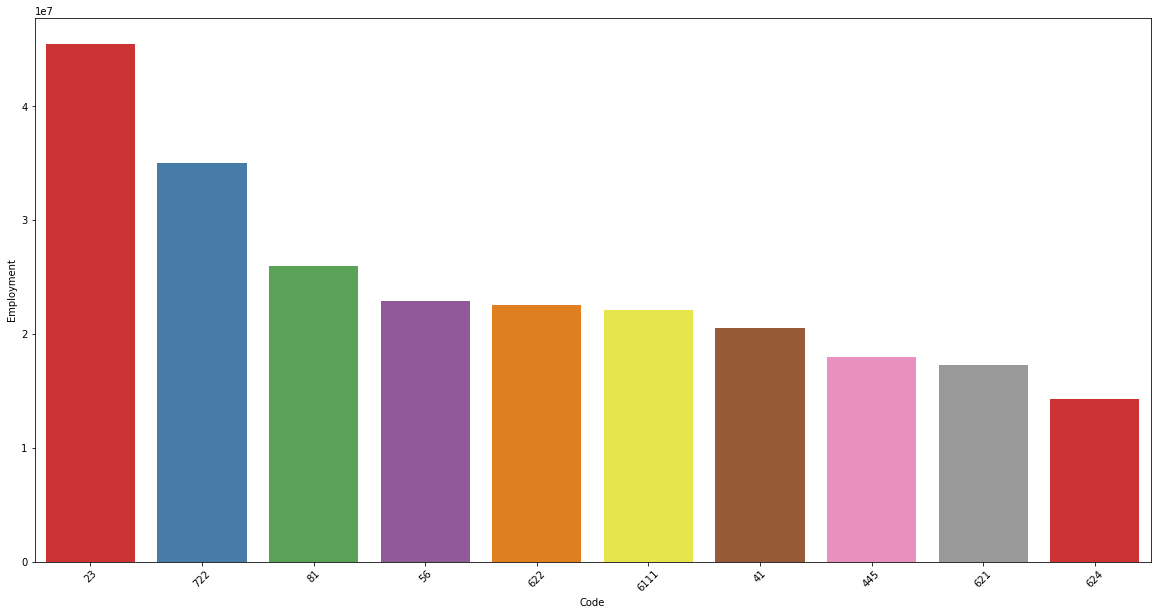

In [119]:
most2 = cd2.groupby(['Code']).agg(Employment=('Employment', 'sum')).reset_index()
most3 = cd3.groupby(['Code']).agg(Employment=('Employment', 'sum')).reset_index()
most4 = cd4.groupby(['Code']).agg(Employment=('Employment', 'sum')).reset_index()
most = most2.append([most3, most4], ignore_index=True)
f = most.sort_values(by='Employment', ascending = False)

import seaborn as sns
plt.figure(figsize=(20,10))
ax = sns.barplot('Code', 'Employment', data=f[:10],order=f['Code'][:10], palette='Set1')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show()

In [120]:
c23 = cd2.loc[cd2['Code'] == 23]
c23

,Year,Month,Naics,Code,CODE2,Employment
4,2000,1,Construction,23,None,106250
24,2000,2,Construction,23,None,115000
44,2000,3,Construction,23,None,106750
64,2000,4,Construction,23,None,105500
84,2000,5,Construction,23,None,113500
...,...,...,...,...,...,...
5376,1999,8,Construction,23,None,120750
5396,1999,9,Construction,23,None,115250
5416,1999,10,Construction,23,None,114000
5436,1999,11,Construction,23,None,118500


In [121]:
f

,Code,Employment
1,23,45485000
76,722,35033250
6,81,26021250
5,56,22940000
69,622,22518250
...,...,...
88,3369,72250
81,919,52750
86,3365,33500
67,526,20750


* The top 2 companies that hire the most in Canada are: construction companies (23) with 86032500, then non-profit services with 47391750 

**Q2: How employment in Construction evolved overtime? In which month the recruitments are most important?**

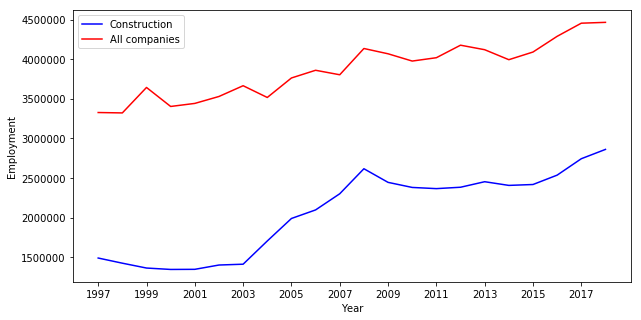

------------
The minimim employment is 1345750 
The maximum employment is 2860750 


In [134]:
import seaborn as sns

#construction employment
c23 = cd2.loc[cd2['Code'] == 23]

construction = c23.groupby(['Year']).agg(Employment=('Employment', 'sum')).reset_index()


#Total employment
ctotal = cd2.loc[cd2['Code'] != 23]
total = ctotal.groupby(['Year']).agg(Employment=('Employment', 'sum')).reset_index()

#Plots
plt.figure(figsize=(10,5))
sns.lineplot('Year', 'Employment', data=construction, color="blue", label="Construction")
sns.lineplot('Year', 'Employment', data=total, color="red", label="All companies")
plt.xticks(np.arange(1997,2019,2))
plt.show()
#print(construction[construction.Employment == construction.Employment.min()])
#print(construction[construction.Employment == construction.Employment.max()])
print('------------')
print("The minimim employment is {} "  .format(construction.Employment.min()))
print("The maximum employment is {} "  .format(construction.Employment.max()))

In [123]:
ctotal

,Year,Month,Naics,Code,CODE2,Employment
1,2000,1,"Administrative and support, waste management a...",56,None,59250
9,2000,1,Management of companies and enterprises,55,None,1000
12,2000,1,Other services (except public administration),81,None,100250
15,2000,1,"Real estate, rental and leasing",53,None,37500
18,2000,1,Utilities,22,None,10750
...,...,...,...,...,...,...
5461,1999,12,Management of companies and enterprises,55,None,1250
5464,1999,12,Other services (except public administration),81,None,99500
5467,1999,12,"Real estate, rental and leasing",53,None,37000
5470,1999,12,Utilities,22,None,10250


In [124]:
import calendar
c23['monthName'] = c23['Month'].apply(lambda x: calendar.month_name[x])
c23

,Year,Month,Naics,Code,CODE2,Employment,monthName
4,2000,1,Construction,23,None,106250,January
24,2000,2,Construction,23,None,115000,February
44,2000,3,Construction,23,None,106750,March
64,2000,4,Construction,23,None,105500,April
84,2000,5,Construction,23,None,113500,May
...,...,...,...,...,...,...,...
5376,1999,8,Construction,23,None,120750,August
5396,1999,9,Construction,23,None,115250,September
5416,1999,10,Construction,23,None,114000,October
5436,1999,11,Construction,23,None,118500,November


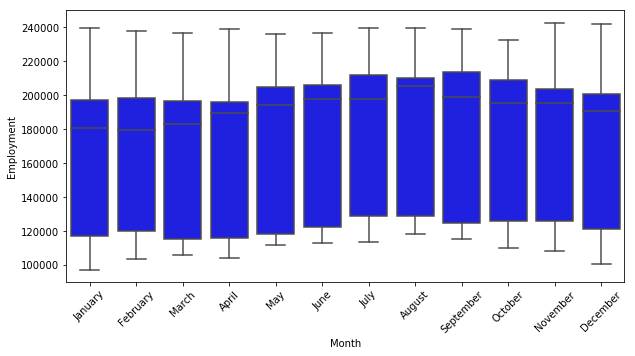

In [125]:
#add month name to dataframe
import calendar
c23 = cd2.loc[cd2['Code'] == 23]
c23['monthName'] = c23['Month'].apply(lambda x: calendar.month_name[x])

#construction employment groupby

const_bymonth = c23.groupby(['Month']).agg(Employment=('Employment', 'sum')).reset_index()

#Plot
plt.figure(figsize=(10,5))
ax = sns.boxplot(x='monthName', y='Employment', data=c23, color="blue")
ax.set(xlabel="Month")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show()

In [126]:
const_bymonth['monthName'] = const_bymonth['Month'].apply(lambda x: calendar.month_name[x])
const_bymonth.sort_values(by='Employment', ascending = False)

,Month,Employment,monthName
7,8,3978750,August
6,7,3950750,July
8,9,3911500,September
9,10,3877500,October
10,11,3859000,November
5,6,3853000,June
11,12,3776250,December
4,5,3771000,May
3,4,3671250,April
1,2,3620500,February


* Employment in construction has fluctuated with a significant downturn in 2000 probably due to the economic crisis. The increase in employment gradually rebounded until 2018, its highest point. From the same year, there was a clear decrease and it is not going to stop with the health crisis of 2020.
* Recruitment in the construction industry is highest for almost 4 months (highest in August). However, the variation is not very significant for the other months, even though December is still the smallest.

**Q3: How employment in Construction evolved over time, compared to the total employment across all industries?**

<Figure size 720x360 with 0 Axes>

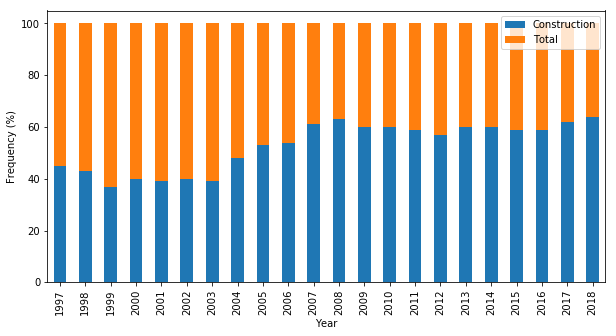

In [127]:

#calculate frequency
construction['Construction'] = round(construction['Employment'] / total['Employment'], 2)*100
construction['Total'] = 100 - round(construction['Employment'] / total['Employment'], 2)*100
#frequency = construction.append(total, ignore_index=False)
#frequency
construction.set_index('Year', inplace=True)
#ploting

plt.figure(figsize=(10,5))
construction[['Construction','Total']].plot(kind='bar', stacked=True, figsize=(10,5))
plt.ylabel("Frequency (%)")
plt.show()


In [128]:
print(construction)


      Employment  Construction  Total
Year                                 
1997     1489750          45.0   55.0
1998     1424750          43.0   57.0
1999     1363500          37.0   63.0
2000     1345750          40.0   60.0
2001     1347250          39.0   61.0
2002     1401500          40.0   60.0
2003     1412000          39.0   61.0
2004     1705000          48.0   52.0
2005     1989000          53.0   47.0
2006     2097000          54.0   46.0
2007     2301000          61.0   39.0
2008     2616750          63.0   37.0
2009     2444750          60.0   40.0
2010     2380750          60.0   40.0
2011     2365750          59.0   41.0
2012     2383250          57.0   43.0
2013     2453000          60.0   40.0
2014     2406500          60.0   40.0
2015     2417750          59.0   41.0
2016     2536000          59.0   41.0
2017     2743250          62.0   38.0
2018     2860750          64.0   36.0


* Generally it is the construction industry that hires the most part of all the companies included in the study, this hiring rate varies on average between 40% and 60%. This result demonstrates the influence of this industry in the Canadian economy.

**Q4: What is the evolution of employment in food manufacturing during the year?**

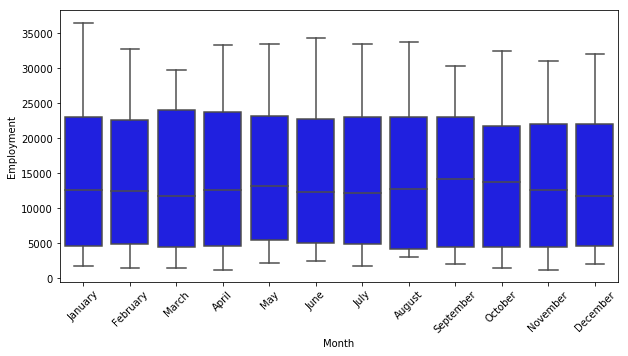

In [129]:
#Food, beverage and tobacco manufacturing 311 & 312
import calendar

cd3 = dataset.loc[dataset['Code'].isin([x for x in list_of_code if x>99 and x<1000])]
cd3['monthName'] = cd3['Month'].apply(lambda x: calendar.month_name[x])
food = cd3.loc[(cd3['Code'] == 311) | (cd3['Code'] == 312)]

#plot
plt.figure(figsize=(10,5))
ax = sns.boxplot(x='monthName', y='Employment', data=food, color="blue")
ax.set(xlabel="Month")
plt.xticks(rotation=45)
plt.show()

In [130]:
import calendar
f = food.groupby(['Month']).agg(Employment=('Employment', 'sum')).reset_index()

f['monthName'] = f['Month'].apply(lambda x: calendar.month_name[x])
ff = f.sort_values(by='Employment', ascending = False)
ff

,Month,Employment,monthName
7,8,647000,August
4,5,639750,May
6,7,631250,July
5,6,629750,June
3,4,624750,April
1,2,623250,February
0,1,620750,January
11,12,620250,December
9,10,618500,October
2,3,617250,March


* Employment in food manufacturing is generally very low and is higher in December than in January.

**Q5:  How employment in Repair, personal and non-profit services evolved over time? At what month are volunteers most needed ?**

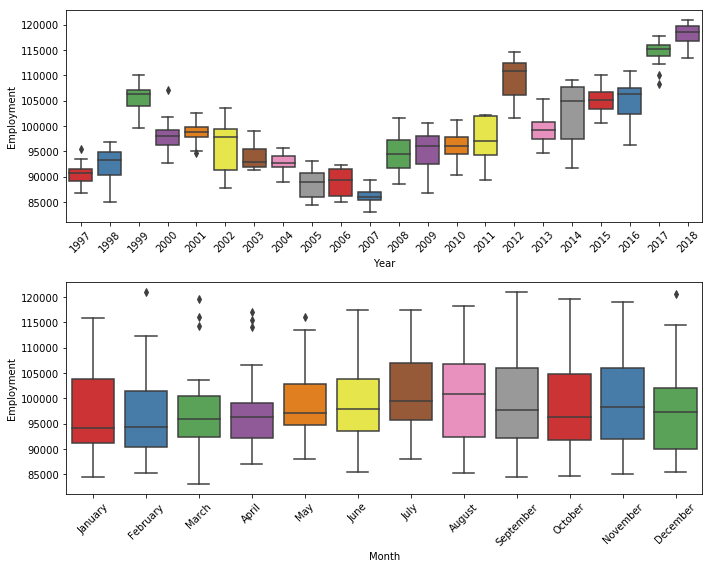

In [131]:
#dataset
volunt = cd2.loc[cd2['Code'] == 81]

volunt['monthName'] = volunt['Month'].apply(lambda x: calendar.month_name[x])

#plot
plt.figure(figsize=(10,8))
plt.subplot(211)
#1
f_vo = sns.boxplot(x='Year', y='Employment', data=volunt, palette='Set1')
f_vo.set(xlabel="Year")
plt.xticks(rotation=45)

plt.subplot(212)
#2
f_vo2 = sns.boxplot(x='monthName', y='Employment', data=volunt, palette='Set1')
f_vo2.set(xlabel="Month")
plt.xticks(rotation=45)

plt.tight_layout()

plt.show()
#volunt

In [132]:

agg_volunt = volunt.groupby(['monthName']).agg(Employment=('Employment', 'mean')).reset_index()

agg_volunt.sort_values(by='Employment', ascending = False)


,monthName,Employment
5,July,100875.000000
1,August,100625.000000
8,May,99454.545455
6,June,99295.454545
9,November,99079.545455
11,September,98386.363636
2,December,98215.909091
0,April,97875.000000
10,October,97636.363636
7,March,97568.181818


* Employment in not-for-profit organizations tends significantly over time. At its lowest level in 2007, it increased in the next few years with some fluctuations, peaking in 2019. Average over the months, the difference is not too significant even if October remains the least important period in terms of employment in this sector.

### D: Conclusion

The previous analyses show that the sector that hires the most is the construction sector. Even if during the year 2000, jobs fell dramatically, probably due to the crisis, a gradual recovery is noted in the following years with 2018 as the year that recorded more hiring. This sector represents a major source of employment compared to other sectors.